## 1. Consider two classes described by the covariance matrices below (assume zero mean) 
                                            a.∑=[1 0]      b.∑=[1 0.9]
                                                [0 1]          [0.9 1]

### a) For each matrix generate 1000 data samples and plot them on separate figures.

Populating the interactive namespace from numpy and matplotlib


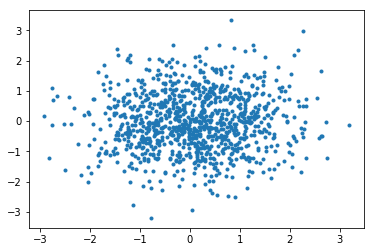

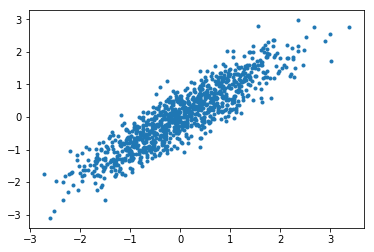

In [94]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import patches
# numpy.set_printoptions(threshold=numpy.inf)



a_cov = [[1.0, 0.0], [0.0, 1.0]]
b_cov = [[1.0, 0.9], [0.9, 1.0]]
mean = [0, 0]

data_a = np.random.multivariate_normal(mean, a_cov, 1000)
plt.plot(data_a[:,0],data_a[:,1],'.')
plt.show()

data_b = np.random.multivariate_normal(mean, b_cov, 1000)
plt.plot(data_b[:,0],data_b[:,1],'.')
plt.show()

### b) For each case calculate first standard deviation contour as a function of the mean, eigenvalues, and eigenvectors. Show your calculation (Hint: consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation.
Plot each contour on the respective plots from part (a).

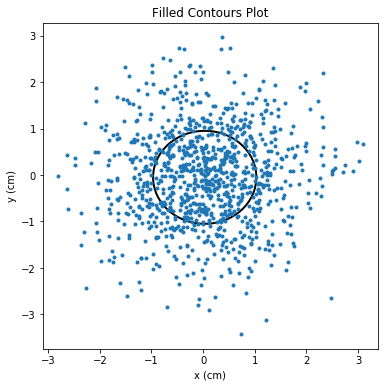

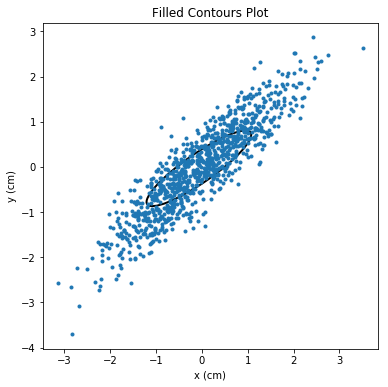

In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches

w_a,v_a=np.linalg.eig(a_cov)
w_b,v_b=np.linalg.eig(b_cov)

std_a=np.sqrt(w_a)
std_b=np.sqrt(w_b)



# XXXXXXXXXXXXXXXXXXXXXX using contour XXXXXXXXXXXXXXXXXXXXXXX
# X, Y = np.meshgrid(data_b[:,0], data_b[:,1])
# A=np.pi
# # n1=(X*np.cos(A)+Y*np.sin(A))**2
# # n2=(X*np.sin(A)+Y*np.cos(A))**2
# d1=(std_b[0]**2)
# d2=(std_b[1]**2)
# Z = -(n1/d1+ n2/d2)

angle = np.degrees(np.arctan(np.dot (v_a[0],np.array ([1,0]))))
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(data_a[:,0], data_a[:,1],'.')
e1 = patches.Ellipse((np.mean(data_a[:,0]), np.mean(data_a[:,1])), 
                     std_a[0]*2, std_a[1]*2,angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()


angle = np.degrees(np.arctan(np.dot (v_b[0],np.array ([1,0]))))
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(data_b[:,0], data_b[:,1],'.')
e2 = patches.Ellipse((np.mean(data_b[:,0]), np.mean(data_b[:,1])),
                     std_b[0]*2, std_b[1]*2, angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e2)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

### c) Calculate sample covariance matrices for each class using the data generated in part(a). Do not use a Python/Matlab function for computing the covariance.

In [3]:
numerator = data_a - np.mean(data_a)
print("Cov(A):\n",np.matmul(numerator.T, numerator) / len(numerator))

numerator = data_b - np.mean(data_b)
print("\nCov(B):\n",np.matmul(numerator.T, numerator) / len(numerator))

Cov(A):
 [[1.0097748  0.04200538]
 [0.04200538 1.06545669]]

Cov(B):
 [[1.02520055 0.90001767]
 [0.90001767 0.97998474]]


### d) Compare the given covariance matrix for each class with the corresponding sample covariance matrix generated in (b).

In [4]:
tmp = np.cov(data_a[:,0],data_a[:,1])
mse = ((a_cov - tmp)**2).mean(axis=None)
print(mse)

0.00202778283439265


## 2. Consider a 2D problem with 3 classes where each class is described by the following priors, mean vectors, and covariance matrices.

                                            P(C1) = 0.2
                                            μ1 =[3 2]𝑇
                                            ∑1=[1 −1] 
                                               [−1 2]

                                            P(C2) = 0.3
                                            μ2 =[5 4]𝑇
                                            ∑2=[1 −1] 
                                                [−1 7]

                                            P(C3) = 0.5
                                            μ3 =[2 5]𝑇
                                            ∑3=[0.5 0.5] 
                                                [0.5 3]

### a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.


-2.588018294692748


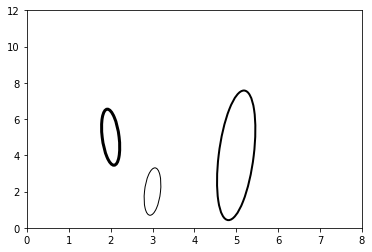

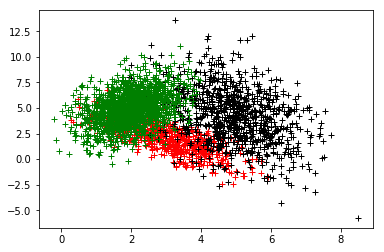

In [5]:
p_1 = 0.2
mean_1 = [3, 2]
cov_1=[[1,-1],[-1,2]]

p_2 = 0.3
mean_2 = [5, 4]
cov_2=[[1,-1],[-1,7]]

p_3 = 0.5
mean_3 = [2, 5]
cov_3=[[0.5,0.5],[0.5,3]]



fig,ax = plt.subplots(1)
ax.set_xlim([0, 8])
ax.set_ylim([0, 12])



w1,vec1=np.linalg.eig(cov_1)
vx, vy = vec1[:,0][0], vec1[:,0][1]
theta = np.arctan2(vy, vx)

print(theta)

e1 = patches.Ellipse((mean_1[0], mean_1[1]), w1[0], w1[1], angle=theta, linewidth=1, fill=False, zorder=1)

w2,v2=np.linalg.eig(cov_2)
vx, vy = v2[:,0][0], v2[:,0][1]
theta = np.arctan2(vy, vx)
e2 = patches.Ellipse((mean_2[0], mean_2[1]), w2[0], w2[1], angle=theta, linewidth=2, fill=False, zorder=1)

w3,v3=np.linalg.eig(cov_3)
vx, vy = v3[:,0][0], v3[:,0][1]
theta = np.arctan2(vy, vx)
e3 = patches.Ellipse((mean_3[0], mean_3[1]), w3[0], w3[1], angle=theta, linewidth=3, fill=False, zorder=1)


ax.add_patch(e1)
ax.add_patch(e2)
ax.add_patch(e3)
plt.show()


data_1 = np.random.multivariate_normal(mean_1, cov_1, int(p_1*3000))
plt.plot(data_1[:,0],data_1[:,1],'r+')

data_2 = np.random.multivariate_normal(mean_2, cov_2, int(p_2*3000))
plt.plot(data_2[:,0],data_2[:,1],'k+')

data_3 = np.random.multivariate_normal(mean_3, cov_3, int(p_3*3000))
plt.plot(data_3[:,0],data_3[:,1],'g+')


plt.show()

### 3. The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the data set is a 28x28 image. The data is divided into two sets of images: a training set and a testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/. Use only the training set to perform this part.

In [10]:
import gzip
import numpy as np

image_size = 28
num_images = 60000

f_train = gzip.open('train-images-idx3-ubyte.gz','r')
f_train.read(16)
buf = f_train.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# train_data = data.reshape(num_images, image_size, image_size)
data = data.reshape(num_images, image_size, image_size)
train_data = data

f_train_label = gzip.open('train-labels-idx1-ubyte.gz','r')
f_train_label.read(8)
buf = f_train_label.read(num_images)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)


num_images = 10000
f_test = gzip.open('t10k-images-idx3-ubyte.gz','r')
f_test.read(16)
buf = f_test.read(image_size * image_size * num_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images, image_size , image_size)


f_test_label = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f_test_label.read(8)
buf = f_test_label.read(num_images)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)


# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# print(train_labels[10])
# print(train_data[10])

a). Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of samples, D is the number of input features, and d is the number of features selected by the PCA algorithm. Note that you must compute the PCA computation method by yourself. You may use preexisting functions for Eigen computation.

In [69]:
def pca_from_no_dimentions(data, dimentions):
    cov = np.cov(data, rowvar = 0)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    eigen_vectors=eigen_vectors.real
    eigen_values=eigen_values.real
    
    mean = np.mean(data, axis = 0)
    X = data - mean
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    largest_eigen_values_index = i[:dimentions]
#     print(largest_eigen_values_index)
    
    
    eigen_vectors_with_largest_eigen_values = eigen_vectors[:,largest_eigen_values_index]
    
    P = np.dot(X, eigen_vectors_with_largest_eigen_values) 
    return np.array(P), eigen_vectors_with_largest_eigen_values, largest_eigen_values_index



lower_dimentions_data, EV, indexes =pca_from_no_dimentions(np.array(data), 154)
print("Original Data Shape:",np.array(data.T).shape)
print("Lower Dimention Data Shape:",lower_dimentions_data.T.shape)

Original Data Shape: (784, 60000)
Lower Dimention Data Shape: (154, 60000)


b) Propose a suitable d using proportion of variance (POV) =95%.

In [8]:
def pca_from_pov(data, pov):
    mean = np.mean(data, axis = 0)
    mean_sub = data - mean
    
    cov = np.cov(mean_sub, rowvar = 0)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    EV = eigen_values
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    sum_eigen_values = np.sum(eigen_values)
    
    data2 = []
    tot = 0.0
    for x in i:
        if tot/sum_eigen_values < pov:
            tot+=eigen_values[x]
            data2.append(data[:,x])
        else: 
            break
    return np.array(data2), eigen_vectors

lower_dimension_data, EV=pca_from_pov(np.array(data),0.95)
print("Original Data Shape:",data.shape)
print("Lower Dimention Data Shape:",lower_dimension_data.shape)

Original Data Shape: (60000, 784)
Lower Dimention Data Shape: (154, 60000)


c) Program PCA reconstruction that takes 𝑌 (dxN) and returns 𝑋 (DxN) (i.e., a
reconstructed image). For different values of d= {1, 2, 3, 4, ..., 784} reconstruct all samples and calculate the average mean square error (MSE). Plot MSE (y-axis) versus d (x-axis). Discuss the results.

In [68]:
lower_dimentions_data, eigen_vector, indexes=pca_from_no_dimentions(np.array(data), 154)
print("Lower Dimention Data Shape:",lower_dimentions_data.shape)

# reconstructed_data = np.array(np.dot(eigen_vector,lower_dimentions_data))
# print("Reconstructed Data Shape ",reconstructed_data.shape)

lower_dimentions_data = lower_dimentions_data.real



# print(data[indexes[0]])
# print(lower_dimentions_data[0])


from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(predictions, targets):
    return float(np.sqrt(np.mean((predictions-targets).real**2)))


# dims = np.arange(len(lower_dimentions_data))
# errors = []
# for i in range(len(indexes)):
# #     print(data.T[indexes[i]])
# #     print(lower_dimentions_data[:,i])
#     error =  data.T[indexes[i]] - lower_dimentions_data[:,i]
#     errors.append(error)
#     break
# print(errors)



# print(len(dims))
# plt.plot(dims,errors)
# plt.show()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  55  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  73  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  97  96  98  99 100 101 102 103 105 104 107 106 108 109 110 112 111 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 129 132 134 133 135 136 131 137 138 140 139 141 142 144 143 145 146 147 148 149 150 151 152 154]
Lower Dimention Data Shape: (60000, 154)


## 4. Once again, consider the MNIST dataset. Use the training set as your training data and the test set as your test data.

a) Classify the test data using a kNN classifier. Report the accuracy for k = {1,3,5,11}. Justify and compare the reported accuracies for the different values of k. Do not use kNN implemented function in Python/Matlab and implement it by yourself.

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0

<Figure size 432x288 with 0 Axes>

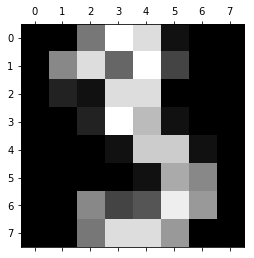

Total 9 0
training data points: 1212
validation data points: 135
testing data points: 450
k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data
I think that digit is: 3  and the label is  3
I think that digit is: 4  and the label is  4
I think that digit is: 2  and the label is  2
I think that digit is: 4  and the label is  4
I think that digit is: 9  and the label is  9


In [10]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
# import imutils
# import cv2

# load the MNIST digits dataset
mnist = datasets.load_digits()




#print (mnist.data)

# Training and testing split,
# 75% for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)




print(mnist.images[3])
print(data[3])
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(mnist.images[3]) 
plt.show()


val = 0;
# for i in range(len(trainLabels)):
#     if trainLabels[i] == 9: 
#         print('\nLabel :', trainLabels[0], 'Data:',trainData[0],) 
#         val+=1
print('Total 9', val)
        

    
# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))


# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in range(1, 30, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))


# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
# print("EVALUATION ON TESTING DATA")
# print(classification_report(testLabels, predictions))

# some indices are classified correctly 100% of the time (precision = 1)
# high accuracy (98%)

# check predictions against images
# loop over a few random digits
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    # np.random.randint(low, high=None, size=None, dtype='l')
    image = testData[i]
    prediction = model.predict([image])[0]
    print("I think that digit is: {}".format(prediction), " and the label is ",testLabels[i])


In [97]:
def get_euclidean_distance(sample1, sample2):
    mat = sample1.__sub__(sample2)
    return (np.sqrt(np.sum(np.power(mat,2))))
   

def my_knn(train_data, train_labels, test_sample, k):
    
    distance_array = []
    for i in range(len(train_data)):
        d = get_euclidean_distance(train_data[i],test_sample)
        distance_array.append([d, train_labels[i]])
        
    distance_array=np.array(distance_array)   
    distance_array = distance_array[distance_array[:,0].argsort()]
    total_neighbours = distance_array[:k]
    
    k_classes= total_neighbours[:,1]
    neighbours_info = []
    for i in range(len(k_classes)):
        val = k_classes[i]
        if len(neighbours_info) == 0:
            neighbours_info.append([val,1])
        else:
            index = 0
            while index < len(neighbours_info):
                if neighbours_info[index][0] == val: 
                    break 
                index+=1
            if index < len(neighbours_info):
                neighbours_info[index][1]+=1
            else:    
                neighbours_info.append([val,1])
    neighbours_info=np.array(neighbours_info) 
    neighbours_info = neighbours_info[neighbours_info[:,1].argsort()]
    neighbours_info=neighbours_info[::-1]
    return k_classes, neighbours_info[0][0]

In [116]:
k = 1

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")    

KeyboardInterrupt: 

In [ ]:
k = 3

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")

In [ ]:
k = 5

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")

In [ ]:
k = 11

train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)

t_init = time.time()
success_full_test_case=0
for i in range(len(test_data)):
    neighbours, class_of_sample = my_knn(train_data,train_labels, test_data[i], k)
    t2 = time.time()
    
    if test_labels[i] == class_of_sample:
        success_full_test_case+=1   
    print("Test:", i+1,"/", len(test_data) ,"  Original Lables:",test_labels[i], 
          "  KNN",k," classified as:",class_of_sample, "  Time consumed:",
          str(t2-t_init)[:5],"Secs.","Accuracy:",str((success_full_test_case/(i+1))*100)[:6],end="\r")

    t_final = time.time()
print("Complete!")